Tathiane Ribeiro Souza

## 1. Explorando os dados


Esta pesquisa utiliza dados sobre Ocorrências de acidentes/incidentes na Aviação Civil Brasileira, irei classificar se foi um incidente ou acidente, com base nos dados coletados.




In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Agora, você pode descobrir os seguintes fatos sobre o conjunto de dados?

- Número total de ocorrências
- Número de incidentes
- Número de acidentes


In [4]:

ocorrencias_data = pd.read_csv("ocorrencias.csv")
print( "Successo!")


Successo!


In [5]:
n_ocorrencias = ocorrencias_data.shape[0]
n_caracteristicas = ocorrencias_data.shape[1]-1
n_acidentes = ocorrencias_data.ocorrencia_classificacao[ocorrencias_data.ocorrencia_classificacao == 1].count()
n_incidentes = ocorrencias_data.ocorrencia_classificacao[ocorrencias_data.ocorrencia_classificacao == 0].count()

print ("Total de ocorrências: {}".format(n_ocorrencias))
print ("Número de acidentes: {}".format(n_acidentes))
print ("Número de incidentes: {}".format(n_incidentes))
print ("Número de colunas de características: {}".format(n_caracteristicas))

Total de ocorrências: 5208
Número de acidentes: 0
Número de incidentes: 0
Número de colunas de características: 21


In [6]:
# Dataset Carregado, limitando as 10 primeira linhas
ocorrencias_data.head(3)

,codigo_ocorrencia,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,...,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao,ocorrencia_classificacao
0,201305055424986,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,...,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28,ACIDENTE
1,201605160250139,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,...,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28,INCIDENTE
2,201805021421302,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28,INCIDENTE


In [7]:
ocorrencias_data['ocorrencia_classificacao']=ocorrencias_data['ocorrencia_classificacao'].replace(['INCIDENTE', 'ACIDENTE'], [0,1])

In [8]:
ocorrencias_data.drop('divulgacao_dia_publicacao',axis=1) # deletando uma coluna

,codigo_ocorrencia,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao,ocorrencia_classificacao
0,201305055424986,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,0,1,NÃO,2018-08-28,1
1,201605160250139,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,0,1,NÃO,2018-08-28,0
2,201805021421302,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,0,1,NÃO,2018-08-28,0
3,201311259977425,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,0,1,NÃO,2018-08-28,0
4,201103187273112,OUTROS,OUTROS,OTHR,-13195.0000,-60.8184,CEREJEIRAS,RO,BRASIL,****,...,13:30:00,NaN,FINALIZADA,***,NÃO,0,1,NÃO,2018-08-28,0
5,200808073991179,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-9.1194,-68.5978,CEREJEIRAS,RO,BRASIL,****,...,15:10:00,NaN,FINALIZADA,A - 517/CENIPA/2016,SIM,0,1,SIM,2018-08-28,1
6,201108118145873,POUSO LONGO,EXCURSÃO DE PISTA,RE,3.7119,-64.1625,AMAJARI,RR,BRASIL,****,...,17:00:00,NaN,FINALIZADA,A-105/CENIPA/2012,SIM,4,1,NÃO,2018-08-28,1
7,201604251335501,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO,MAC,3.5544,-61.8694,AMAJARI,RR,BRASIL,****,...,05:48:00,SIM,ATIVA,IG-069/CENIPA/2016,NÃO,0,2,NÃO,2018-08-28,0
8,201604062021424,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,BRASIL,SWAQ,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2,1,SIM,2018-08-28,1
9,200902274965349,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.6521,-61.4206,AMAJARI,RR,BRASIL,****,...,16:30:00,NaN,FINALIZADA,***,NÃO,0,1,SIM,2018-08-28,0


In [9]:
ocorrencias_data.head()

,codigo_ocorrencia,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,...,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao,ocorrencia_classificacao
0,201305055424986,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,...,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28,1
1,201605160250139,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,...,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28,0
2,201805021421302,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28,0
3,201311259977425,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28,0
4,201103187273112,OUTROS,OUTROS,OTHR,-13195.0000,-60.8184,CEREJEIRAS,RO,BRASIL,****,...,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28,0


## 2. Preparando os dados
Nesta seção, prepararemos os dados para modelagem, treinamento e teste.

### Identificar colunas de características e de destino

Separado os dados em colunas de características e de destino e verificar se se esses dados são ou não numéricos. <br/>
** Nota **: Para este conjunto de dados, a última coluna (`'ocorrencia_classificacao'`) é o destino que estamos tentando prever.

In [10]:
feature_cols = list (ocorrencias_data.columns [1:-1])
target_col = ocorrencias_data.columns [-1] #  coluna de destino
print ("coluna (s) de características: - \n {}". format (feature_cols))
print ("\ncoluna de destino: {}". format (target_col))

X_all = ocorrencias_data [feature_cols] # feactures-caracteristicas
y_all = ocorrencias_data [target_col] # coluna resposta
#print ("\n Características: -")
#print (X_all.head ()) # imprime as primeiras 5 linhas
#print (y_all.head ()) 

coluna (s) de características: - 
 ['ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'ocorrencia_tipo_icao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_horario', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes', 'total_aeronaves_envolvidas', 'ocorrencia_saida_pista', 'ocorrencia_dia_extracao']

coluna de destino: ocorrencia_classificacao


## 3. Pré-processamento dos dados

 OneHotEncoder, convertendo dados não numéricos em numéricos.


In [11]:
# Colunas de recurso de pré-processamento
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index) 
    #Verifique cada coluna
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  

        outX = outX.join(col_data) 
    return outX

X_all = preprocess_features(X_all)
print ("Colunas processadas ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))
X_all.head(3)

Colunas processadas (7249):-
['ocorrencia_tipo_AERONAVE ATINGIDA POR OBJETO', 'ocorrencia_tipo_AERÓDROMO', 'ocorrencia_tipo_ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO', 'ocorrencia_tipo_CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO', 'ocorrencia_tipo_CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO', 'ocorrencia_tipo_CAUSADO POR RICOCHETE', 'ocorrencia_tipo_COLISÃO COM AERONAVE NO SOLO', 'ocorrencia_tipo_COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO', 'ocorrencia_tipo_COLISÃO COM OBSTÁCULOS NO SOLO', 'ocorrencia_tipo_COLISÃO DE AERONAVES EM VOO', 'ocorrencia_tipo_COLISÃO DE VEÍCULO COM AERONAVE', 'ocorrencia_tipo_COLISÃO EM VOO COM OBJETO REBOCADO', 'ocorrencia_tipo_COM COMANDOS DE VOO', 'ocorrencia_tipo_COM HÉLICE', 'ocorrencia_tipo_COM LANÇAMENTO DE CARGA', 'ocorrencia_tipo_COM LANÇAMENTO DE PESSOAS', 'ocorrencia_tipo_COM PARA-BRISAS / JANELA / PORTA', 'ocorrencia_tipo_COM PESSOAL EM VOO', 'ocorrencia_tipo_COM ROTOR', 'ocorrencia_tipo_COM TREM DE POUSO', 'ocorrencia_tipo_CONTATO ANORMAL C

,ocorrencia_tipo_AERONAVE ATINGIDA POR OBJETO,ocorrencia_tipo_AERÓDROMO,ocorrencia_tipo_ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO,ocorrencia_tipo_CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ocorrencia_tipo_CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO,ocorrencia_tipo_CAUSADO POR RICOCHETE,ocorrencia_tipo_COLISÃO COM AERONAVE NO SOLO,ocorrencia_tipo_COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,ocorrencia_tipo_COLISÃO COM OBSTÁCULOS NO SOLO,ocorrencia_tipo_COLISÃO DE AERONAVES EM VOO,...,divulgacao_dia_publicacao_2018-04-05,divulgacao_dia_publicacao_2018-05-10,divulgacao_dia_publicacao_2018-05-17,divulgacao_dia_publicacao_2018-06-25,divulgacao_dia_publicacao_2018-07-27,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista_NÃO,ocorrencia_saida_pista_SIM,ocorrencia_dia_extracao_2018-08-28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


### Dividir os dados em conjuntos de treinamento e teste

In [12]:
# Primeiro, decida quantas amostras de treinamento e teste você deseja
num_all = ocorrencias_data.shape[0]  
#from sklearn.model_selection import train_test_split
num_train = 4000 
num_test = num_all - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=4000)
print ("Conjunto de treinamento: {} ".format(X_train.shape[0]))
print ("Conjunto de teste: {} ".format(X_test.shape[0]))

Conjunto de treinamento: 4000 
Conjunto de teste: 1208 


## 4. Treinando e avaliando modelos
Escolhi os seguintes modelos, para essa avaliação supervisionada:
 - Decision Tree
 - GaussianNB
 - Logistic Regression
 - Perceptron
 - LinearSVC

In [13]:
# Treinando o modelo
import time

def train_classifier(clf, X_train, y_train):
    print ("Treinando {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Tempo de treino (secs): {:.3f}".format(end - start))
    return end - start

clf = DecisionTreeClassifier()

# Ajustar o modelo aos dados de treinamento
train_classifier(clf, X_train, y_train)  

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 4.674


4.674300193786621

In [14]:
# Prever e calcular a pontuação F1
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print ("Prevendo rótulos usando {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Tempo de previsão (secs): {:.3f}".format(end - start))

    return f1_score(target.values, y_pred, pos_label=1, average='micro'), end - start

train_f1_score = predict_labels(clf, X_train, y_train)
print (" F1score para o conjunto de treinamento: {}".format(train_f1_score[0]))


Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.437
 F1score para o conjunto de treinamento: 1.0


### Processando vários modelos
#### Teste 1 -  Utilizando os parâmentros default

In [81]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
#classifiers = [DecisionTreeClassifier(), Perceptron()]
classifiers = [DecisionTreeClassifier(), GaussianNB(), LogisticRegression(), Perceptron(), svm.LinearSVC()] 
results = { 
        'Classificador': [],
        'Tamanho': [], 
        'Tempo treino': [], 
        'Tempo predisão': [], 
        'F1 score - treino': [], 
        'F1 score - teste': [],
        'Acurácia ':[]
    }
datasets = [train_test_split(X_all, y_all, train_size=x, test_size=1208) for x in [4000]]
for clf in classifiers:
    for data in datasets:
        X_train, X_test, y_train, y_test = data
        time_train = train_classifier(clf, X_train, y_train)
        f1_train, time_predict = predict_labels(clf, X_train, y_train)
        f1_test, time_predict = predict_labels(clf, X_test,y_test)
        
        clf.fit(X_train, y_train) # Treinar nosso classificador

        preds = clf.predict(X_test) # Fazer previsões
        acuracia = accuracy_score(y_test, preds)
        
        results['Classificador'].append(clf.__class__.__name__)
        results['Tamanho'].append(X_train.shape[0])
        results['Tempo treino'].append("{:.3f}".format(time_train))
        results['Tempo predisão'].append("{:.3f}".format(time_predict))
        results['F1 score - treino'].append(f1_train)
        results['F1 score - teste'].append(f1_test)
        results['Acurácia '].append(acuracia)
        
pd.DataFrame(results)

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 2.872
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.411
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.123
Treinando GaussianNB...
Tempo de treino (secs): 1.818
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 1.664
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.548
Treinando LogisticRegression...
Tempo de treino (secs): 1.127
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.327
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.107
Treinando Perceptron...
Tempo de treino (secs): 1.624
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.324
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.110
Treinando LinearSVC...
Tempo de treino (secs): 1.778
Prevendo rótulos usando LinearSVC...
Tempo de previsão (secs): 0.333
Prevendo rótulos usando LinearSVC...
Tempo

,Classificador,Tamanho,Tempo treino,Tempo predisão,F1 score - treino,F1 score - teste,Acurácia
0,DecisionTreeClassifier,4000,2.872,0.123,1.00000,0.845199,0.850993
1,GaussianNB,4000,1.818,0.548,0.84000,0.807947,0.807947
2,LogisticRegression,4000,1.127,0.107,0.96350,0.879139,0.879139
3,Perceptron,4000,1.624,0.110,0.67325,0.666391,0.666391
4,LinearSVC,4000,1.778,0.106,0.97275,0.852649,0.839404


#### Teste 2 

In [71]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
classifiers = [DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=100), 
               GaussianNB(var_smoothing=556464846889.586), 
               LogisticRegression(penalty='l2', dual=True),  
               Perceptron(penalty='l2', alpha=0.0002,),
               svm.LinearSVC(loss='hinge')] 
results = { 
        'Classificador': [],
        'Tamanho': [], 
        'Tempo treino': [], 
        'Tempo predisão': [], 
        'F1 score - treino': [], 
        'F1 score - teste': [],
        'Acurácia ':[]
    }
datasets = [train_test_split(X_all, y_all, train_size=x, test_size=1208) for x in [4000]]
for clf in classifiers:
    for data in datasets:
        X_train, X_test, y_train, y_test = data
        time_train = train_classifier(clf, X_train, y_train)
        f1_train, time_predict = predict_labels(clf, X_train, y_train)
        f1_test, time_predict = predict_labels(clf, X_test,y_test)
        
        clf.fit(X_train, y_train) # Treinar nosso classificador

        preds = clf.predict(X_test) # Fazer previsões
        acuracia = accuracy_score(y_test, preds)
        
        results['Classificador'].append(clf.__class__.__name__)
        results['Tamanho'].append(X_train.shape[0])
        results['Tempo treino'].append("{:.3f}".format(time_train))
        results['Tempo predisão'].append("{:.3f}".format(time_predict))
        results['F1 score - treino'].append(f1_train)
        results['F1 score - teste'].append(f1_test)
        results['Acurácia '].append(acuracia)
        
pd.DataFrame(results)

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 1.825
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.401
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.135
Treinando GaussianNB...
Tempo de treino (secs): 1.628
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 1.531
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.463
Treinando LogisticRegression...
Tempo de treino (secs): 1.403
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.295
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.108
Treinando Perceptron...
Tempo de treino (secs): 1.465
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.355
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.079
Treinando LinearSVC...
Tempo de treino (secs): 1.804
Prevendo rótulos usando LinearSVC...
Tempo de previsão (secs): 0.306
Prevendo rótulos usando LinearSVC...
Tempo

,Classificador,Tamanho,Tempo treino,Tempo predisão,F1 score - treino,F1 score - teste,Acurácia
0,DecisionTreeClassifier,4000,1.825,0.135,1.00000,0.841887,0.841887
1,GaussianNB,4000,1.628,0.463,0.67500,0.657285,0.657285
2,LogisticRegression,4000,1.403,0.108,0.88525,0.859272,0.817881
3,Perceptron,4000,1.465,0.079,0.67325,0.662252,0.662252
4,LinearSVC,4000,1.804,0.106,0.96925,0.848510,0.856788


#### Teste 3

In [72]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
classifiers = [DecisionTreeClassifier(max_features=5, random_state=50, max_leaf_nodes=20),
               GaussianNB(var_smoothing=9.7), 
               LogisticRegression(class_weight='balanced', random_state=100, solver='saga'), 
               Perceptron(max_iter=100, tol=0.002, shuffle=False, verbose=3),
               svm.LinearSVC(multi_class= 'crammer_singer')] 
results = { 
        'Classificador': [],
        'Tamanho': [], 
        'Tempo treino': [], 
        'Tempo predisão': [], 
        'F1 score - treino': [], 
        'F1 score - teste': [],
        'Acurácia ':[]
    }
datasets = [train_test_split(X_all, y_all, train_size=x, test_size=1208) for x in [4000]]
for clf in classifiers:
    for data in datasets:
        X_train, X_test, y_train, y_test = data
        time_train = train_classifier(clf, X_train, y_train)
        f1_train, time_predict = predict_labels(clf, X_train, y_train)
        f1_test, time_predict = predict_labels(clf, X_test,y_test)
        
        clf.fit(X_train, y_train) # Treinar nosso classificador

        preds = clf.predict(X_test) # Fazer previsões
        acuracia = accuracy_score(y_test, preds)
        
        results['Classificador'].append(clf.__class__.__name__)
        results['Tamanho'].append(X_train.shape[0])
        results['Tempo treino'].append("{:.3f}".format(time_train))
        results['Tempo predisão'].append("{:.3f}".format(time_predict))
        results['F1 score - treino'].append(f1_train)
        results['F1 score - teste'].append(f1_test)
        results['Acurácia '].append(acuracia)
        
pd.DataFrame(results)

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 0.400
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.363
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.167
Treinando GaussianNB...
Tempo de treino (secs): 1.734
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 1.528
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.492
Treinando LogisticRegression...
Tempo de treino (secs): 66.305
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.302
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.097
Treinando Perceptron...
-- Epoch 1
Norm: 22714.42, NNZs: 3677, Bias: -168.000000, T: 4000, Avg. loss: 19135370.468864
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 22747.90, NNZs: 3855, Bias: -131.000000, T: 8000, Avg. loss: 19746756.631676
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 22839.39, NNZs: 3875, Bias: -93.000000, T: 12000, Avg. los

,Classificador,Tamanho,Tempo treino,Tempo predisão,F1 score - treino,F1 score - teste,Acurácia
0,DecisionTreeClassifier,4000,0.400,0.167,0.67400,0.674669,0.674669
1,GaussianNB,4000,1.734,0.492,0.67000,0.673841,0.673841
2,LogisticRegression,4000,66.305,0.097,0.73175,0.724338,0.724338
3,Perceptron,4000,1.558,0.107,0.67225,0.674669,0.674669
4,LinearSVC,4000,97.888,0.105,0.97175,0.850993,0.849338


#### Teste 4

In [73]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
classifiers = [DecisionTreeClassifier(random_state=1000, min_samples_split=3),
               GaussianNB(var_smoothing=5.4), 
               LogisticRegression(C=2.0), 
               Perceptron(penalty='l1',  n_iter_no_change = 10),
               svm.LinearSVC(random_state = 1000)] 
results = { 
        'Classificador': [],
        'Tamanho': [], 
        'Tempo treino': [], 
        'Tempo predisão': [], 
        'F1 score - treino': [], 
        'F1 score - teste': [],
        'Acurácia ':[]
    }
datasets = [train_test_split(X_all, y_all, train_size=x, test_size=1208) for x in [4000]]
for clf in classifiers:
    for data in datasets:
        X_train, X_test, y_train, y_test = data
        time_train = train_classifier(clf, X_train, y_train)
        f1_train, time_predict = predict_labels(clf, X_train, y_train)
        f1_test, time_predict = predict_labels(clf, X_test,y_test)
        
        clf.fit(X_train, y_train) # Treinar nosso classificador

        preds = clf.predict(X_test) # Fazer previsões
        acuracia = accuracy_score(y_test, preds)
        
        results['Classificador'].append(clf.__class__.__name__)
        results['Tamanho'].append(X_train.shape[0])
        results['Tempo treino'].append("{:.3f}".format(time_train))
        results['Tempo predisão'].append("{:.3f}".format(time_predict))
        results['F1 score - treino'].append(f1_train)
        results['F1 score - teste'].append(f1_test)
        results['Acurácia '].append(acuracia)
        
pd.DataFrame(results)

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 3.882
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.301
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.129
Treinando GaussianNB...
Tempo de treino (secs): 1.916
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 1.683
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.495
Treinando LogisticRegression...
Tempo de treino (secs): 0.992
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.260
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.079
Treinando Perceptron...
Tempo de treino (secs): 3.090
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.280
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.113
Treinando LinearSVC...
Tempo de treino (secs): 1.558
Prevendo rótulos usando LinearSVC...
Tempo de previsão (secs): 0.315
Prevendo rótulos usando LinearSVC...
Tempo

,Classificador,Tamanho,Tempo treino,Tempo predisão,F1 score - treino,F1 score - teste,Acurácia
0,DecisionTreeClassifier,4000,3.882,0.129,0.99925,0.873344,0.873344
1,GaussianNB,4000,1.916,0.495,0.66025,0.706126,0.706126
2,LogisticRegression,4000,0.992,0.079,0.97550,0.893212,0.893212
3,Perceptron,4000,3.090,0.113,0.65675,0.697020,0.697020
4,LinearSVC,4000,1.558,0.106,0.95175,0.860099,0.860099


#### Teste 5

In [74]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
classifiers = [DecisionTreeClassifier(criterion='entropy', splitter='random'),
               GaussianNB(var_smoothing=1.0), 
               LogisticRegression(solver='sag'), 
               Perceptron(eta0=0.1, n_iter_no_change=20),
               svm.LinearSVC(max_iter=500)] 
results = { 
        'Classificador': [],
        'Tamanho': [], 
        'Tempo treino': [], 
        'Tempo predisão': [], 
        'F1 score - treino': [], 
        'F1 score - teste': [],
        'Acurácia ':[]
    }
datasets = [train_test_split(X_all, y_all, train_size=x, test_size=1208) for x in [4000]]
for clf in classifiers:
    for data in datasets:
        X_train, X_test, y_train, y_test = data
        time_train = train_classifier(clf, X_train, y_train)
        f1_train, time_predict = predict_labels(clf, X_train, y_train)
        f1_test, time_predict = predict_labels(clf, X_test,y_test)
        
        clf.fit(X_train, y_train) # Treinar nosso classificador

        preds = clf.predict(X_test) # Fazer previsões
        acuracia = accuracy_score(y_test, preds)
        
        
        results['Classificador'].append(clf.__class__.__name__)
        results['Tamanho'].append(X_train.shape[0])
        results['Tempo treino'].append("{:.3f}".format(time_train))
        results['Tempo predisão'].append("{:.3f}".format(time_predict))
        results['F1 score - treino'].append(f1_train)
        results['F1 score - teste'].append(f1_test)
        results['Acurácia '].append(acuracia)
        
pd.DataFrame(results)

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 2.102
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.445
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.123
Treinando GaussianNB...
Tempo de treino (secs): 1.727
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 1.616
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.482
Treinando LogisticRegression...
Tempo de treino (secs): 55.170
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.334
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.106
Treinando Perceptron...
Tempo de treino (secs): 1.607
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.307
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.109
Treinando LinearSVC...
Tempo de treino (secs): 1.405
Prevendo rótulos usando LinearSVC...
Tempo de previsão (secs): 0.309
Prevendo rótulos usando LinearSVC...
Temp

,Classificador,Tamanho,Tempo treino,Tempo predisão,F1 score - treino,F1 score - teste,Acurácia
0,DecisionTreeClassifier,4000,2.102,0.123,1.00000,0.857616,0.854305
1,GaussianNB,4000,1.727,0.482,0.66475,0.691225,0.691225
2,LogisticRegression,4000,55.170,0.106,0.66525,0.692053,0.692053
3,Perceptron,4000,1.607,0.109,0.66575,0.696192,0.696192
4,LinearSVC,4000,1.405,0.107,0.92150,0.822848,0.843543


## 5. Avaliando os Modelos
 ### Curva ROC

- Plotar a curva roc dos 5 algorítmos com os melhores parâmetros

In [16]:
def plot_roc_curve(y_true, y_score):
    from sklearn.metrics import roc_curve, auc
    
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(9, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (auc = {:0.2}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Taxa positiva falsa')
    plt.ylabel('Taxa positiva verdadeira')
    plt.title('Curva Roc')
    plt.legend(loc="lower right")

def plot_confusion_matrix(cm, class_names):
    import itertools
   
    cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]
 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confulsão')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > cm.max() / 2 else "black"
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)
        
    plt.ylabel('Rótulo verdadeiro')
    plt.xlabel('Rótulo previsto')
    plt.show()

- O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

#### DecisionTreeClassifier

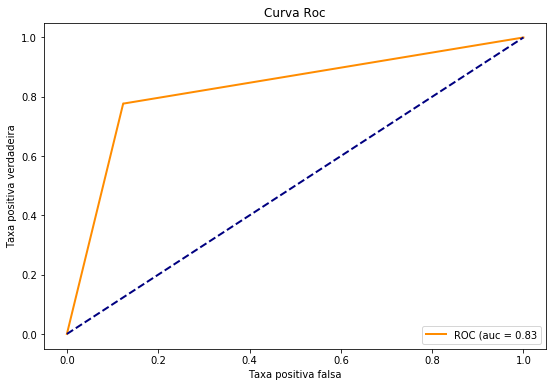

In [76]:
clf = DecisionTreeClassifier(random_state=1000, min_samples_split=3)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test,y_score) 

#### LogisticRegression

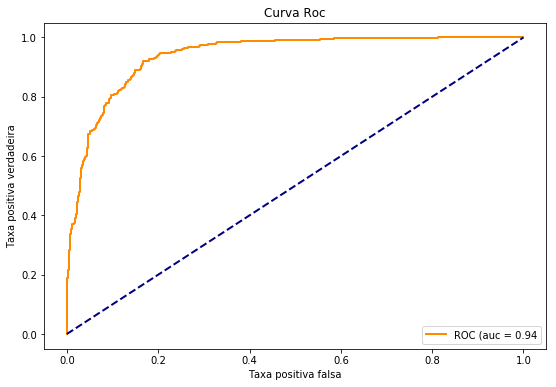

In [77]:
clf =LogisticRegression(C=2.0)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test,y_score) 

#### GaussianNB

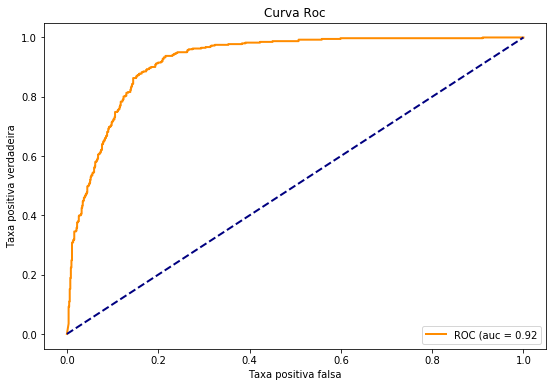

In [85]:
clf = GaussianNB() 
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test,y_score) 


#### LinearSVC

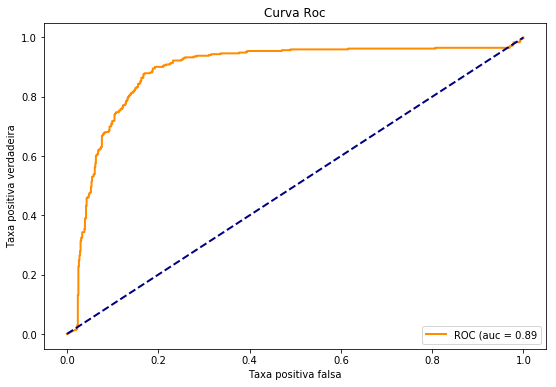

In [79]:

from sklearn import svm
clf=svm.LinearSVC(max_iter=500)
clf.fit(X_train, y_train)
y_score = clf._predict_proba_lr(X_test)[:, 1]

plot_roc_curve(y_test,y_score) 

#### Perceptron

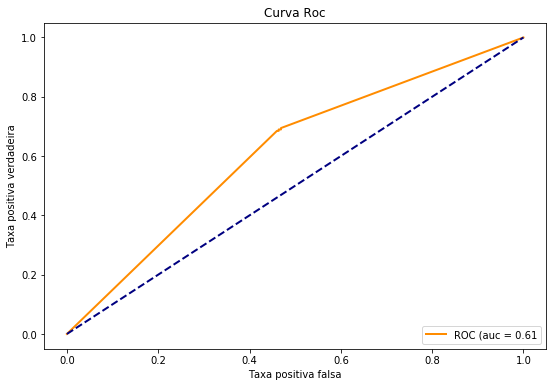

In [19]:
clf = Perceptron(penalty='l1',  n_iter_no_change = 10)
clf.fit(X_train, y_train)
y_score = clf._predict_proba_lr(X_test)[:, 1]

plot_roc_curve(y_test,y_score) 


### Dos 5 algorítmos testados o que retornou um resultado mais baixo para esta base de dados foi o Perceptron, os demais retornaram valores semelhantes em torno de 85.0 de acurácia
